Notebook ini bertujuan untuk mengetahui adanya kenaikan secara sistematik dalam ketidaksesuain kuliah dengan pekerjaan dalam tracer study ITB tahun 2020 - 2022.

Metode yang digunakan adalah penggunaan Pearson correlation.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7026 sha256=73245665a4b184cd126f2bc5596d131b2773f16c7ed7fe8df544faf709312294
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [63]:
import pingouin

In [44]:
data_path = "data.csv"

df = pd.read_csv(data_path)

In [45]:
df.head()

,Tahun Tracer Study,Jurusan,Pekerjaan dengan kuliah tidak sesuai (%),Jumlah responden,Weighted Sum
0,2022,MRI,0.25,32,8.00
1,2022,Bioenergi,0.67,18,12.06
2,2022,Teknik Fisika,0.52,56,29.12
3,2022,Teknik Industri,0.42,76,31.92
4,2022,Teknik Kimia,0.61,54,32.94


In [46]:
df.dtypes

Tahun Tracer Study                            int64
Jurusan                                      object
Pekerjaan dengan kuliah tidak sesuai (%)    float64
Jumlah responden                              int64
Weighted Sum                                float64
dtype: object

In [47]:
df["Tahun Tracer Study"] = df["Tahun Tracer Study"].astype('int32')
df["Tahun Tracer Study"] = pd.to_datetime(df["Tahun Tracer Study"], format='%Y').dt.year

In [48]:
df.dtypes

Tahun Tracer Study                            int64
Jurusan                                      object
Pekerjaan dengan kuliah tidak sesuai (%)    float64
Jumlah responden                              int64
Weighted Sum                                float64
dtype: object

Text(0.5, 1.0, 'Ketidaksesuaian kuliah dengan pekerjaan (%)')

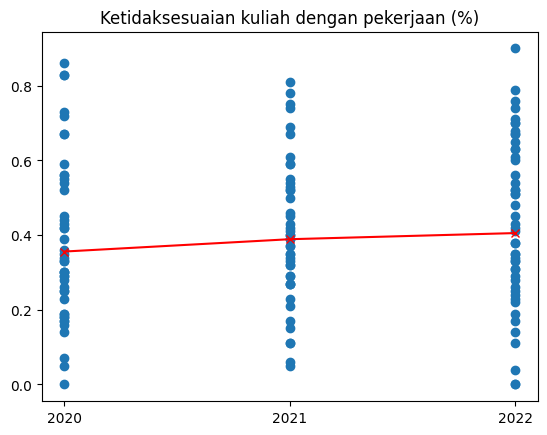

In [61]:
x = df["Tahun Tracer Study"]
y = df["Pekerjaan dengan kuliah tidak sesuai (%)"]

mean_2020 = np.sum(df[df["Tahun Tracer Study"] == 2020]["Weighted Sum"])/np.sum(df[df["Tahun Tracer Study"] == 2020]["Jumlah responden"])
mean_2021 = np.sum(df[df["Tahun Tracer Study"] == 2021]["Weighted Sum"])/np.sum(df[df["Tahun Tracer Study"] == 2021]["Jumlah responden"])
mean_2022 = np.sum(df[df["Tahun Tracer Study"] == 2022]["Weighted Sum"])/np.sum(df[df["Tahun Tracer Study"] == 2022]["Jumlah responden"])

#confidence_interval_2020 =
plt.scatter(x, y, marker="o")
plt.plot([2020, 2021, 2022], [mean_2020, mean_2021, mean_2022], marker="x", color="r")

plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.title("Ketidaksesuaian kuliah dengan pekerjaan (%)")

In [65]:
df_corr = df.groupby(["Tahun Tracer Study"]).sum()
df_corr["Weighted Average"] = df_corr["Weighted Sum"]/df_corr["Jumlah responden"]
df_corr

<ipython-input-65-05b9d84badaf>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_corr = df.groupby(["Tahun Tracer Study"]).sum()


,Pekerjaan dengan kuliah tidak sesuai (%),Jumlah responden,Weighted Sum,Weighted Average
Tahun Tracer Study,,,,
2020,17.14,2072,737.75,0.356057
2021,18.37,2312,899.60,0.389100
2022,21.29,1973,800.11,0.405530


In [71]:
pingouin.corr(x=df_corr.index,
              y=df_corr["Weighted Average"],
              alternative="greater",
              method="pearson")

/usr/local/lib/python3.10/dist-packages/pingouin/effsize.py:153: RuntimeWarning: divide by zero encountered in double_scalars
  se = 1 / np.sqrt(nx - 3)
/usr/local/lib/python3.10/dist-packages/pingouin/power.py:861: UserWarning: Sample size is too small to estimate power (n <= 4). Returning NaN.
  warnings.warn("Sample size is too small to estimate power (n <= 4). Returning NaN.")


,n,r,CI95%,p-val,BF10,power
pearson,3,0.981718,"[-1.0, 1.0]",0.06096,2.609,NaN


Pearson correlation 0.98 menunjukkan adanya indikasi kenaikan ketidaksesuaian kuliah dengan pekerjaan. Dengan menggunakan confidence interval 10%, angka ini cukup menandakan adanya kenaikan yang sistematik dengan p-value bernilai 6%.